In [6]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import torch
from torch.utils.data import Dataset, DataLoader

# Create torchvision Dataset

In [7]:
class GenresDataset(Dataset):
    
    def __init__(self):
        self.data = pd.read_parquet('../data/main_df.parquet')
        self.class_map = {
            "Jazz": 0,
            "R&B": 1,
            "Pop": 2,
            "Rap/Hip Hop": 3,
            "Alternative": 4,
            "Rock": 5,
            "Metal": 6,
            "Electro": 7
        }

    def __len__(self):
        # len of our dataset
        return len(self.data)
    
    def __getitem__(self, idx):
        # magic func to get image and its class
        
        # path_to_image and name of image's class
        img_path = self.data.loc[idx, "album_cover_local_name"]
        class_name = self.data.loc[idx, "primary_album_genre"]
        
        # read image pixels and transform into tensor
        img = cv2.imread(img_path)
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        
        # read image's class and transform into tensor
        class_id = self.class_map[class_name]
        class_id = torch.tensor([class_id])
        return img_tensor, class_id
    
    def get_info_about_album(self, idx):
        # func to read all necessary info about album
        return {"title": self.data.loc[idx, "album_title"],
                "artist": self.data.loc[idx, "album_artist"],
                "genre": self.data.loc[idx, "primary_album_genre"]}
    
    def album_cover(self, idx):
        # func to print album cover image
        img_path = self.data.loc[idx, "album_cover_local_name"]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image);

In [8]:
q = GenresDataset()

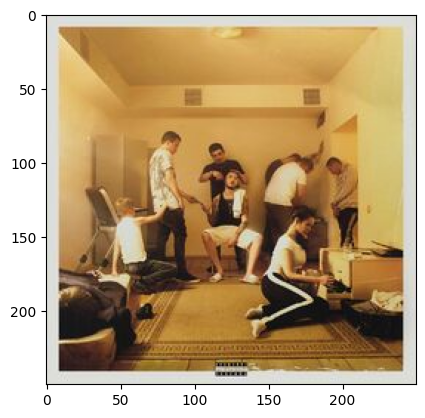

In [11]:
q.album_cover(3238)

In [12]:
q.get_info_about_album(3238)

{'title': 'Уроборос: Улица 36', 'artist': 'Скриптонит', 'genre': 'Rap/Hip Hop'}